# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
import time

### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [102]:
3

3

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [103]:
import pandas as pd

In [104]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [105]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [106]:
df.shape

(41188, 21)

In [107]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [108]:
df.duplicated().sum()

12

In [109]:
df.drop_duplicates(inplace = True)

In [110]:
df.shape

(41176, 21)

In [111]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>],
       [<Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'emp.var.rate'}>],
       [<Axes: title={'center': 'cons.price.idx'}>,
        <Axes: title={'center': 'cons.conf.idx'}>,
        <Axes: title={'center': 'euribor3m'}>],
       [<Axes: title={'center': 'nr.employed'}>, <Axes: >, <Axes: >]],
      dtype=object)

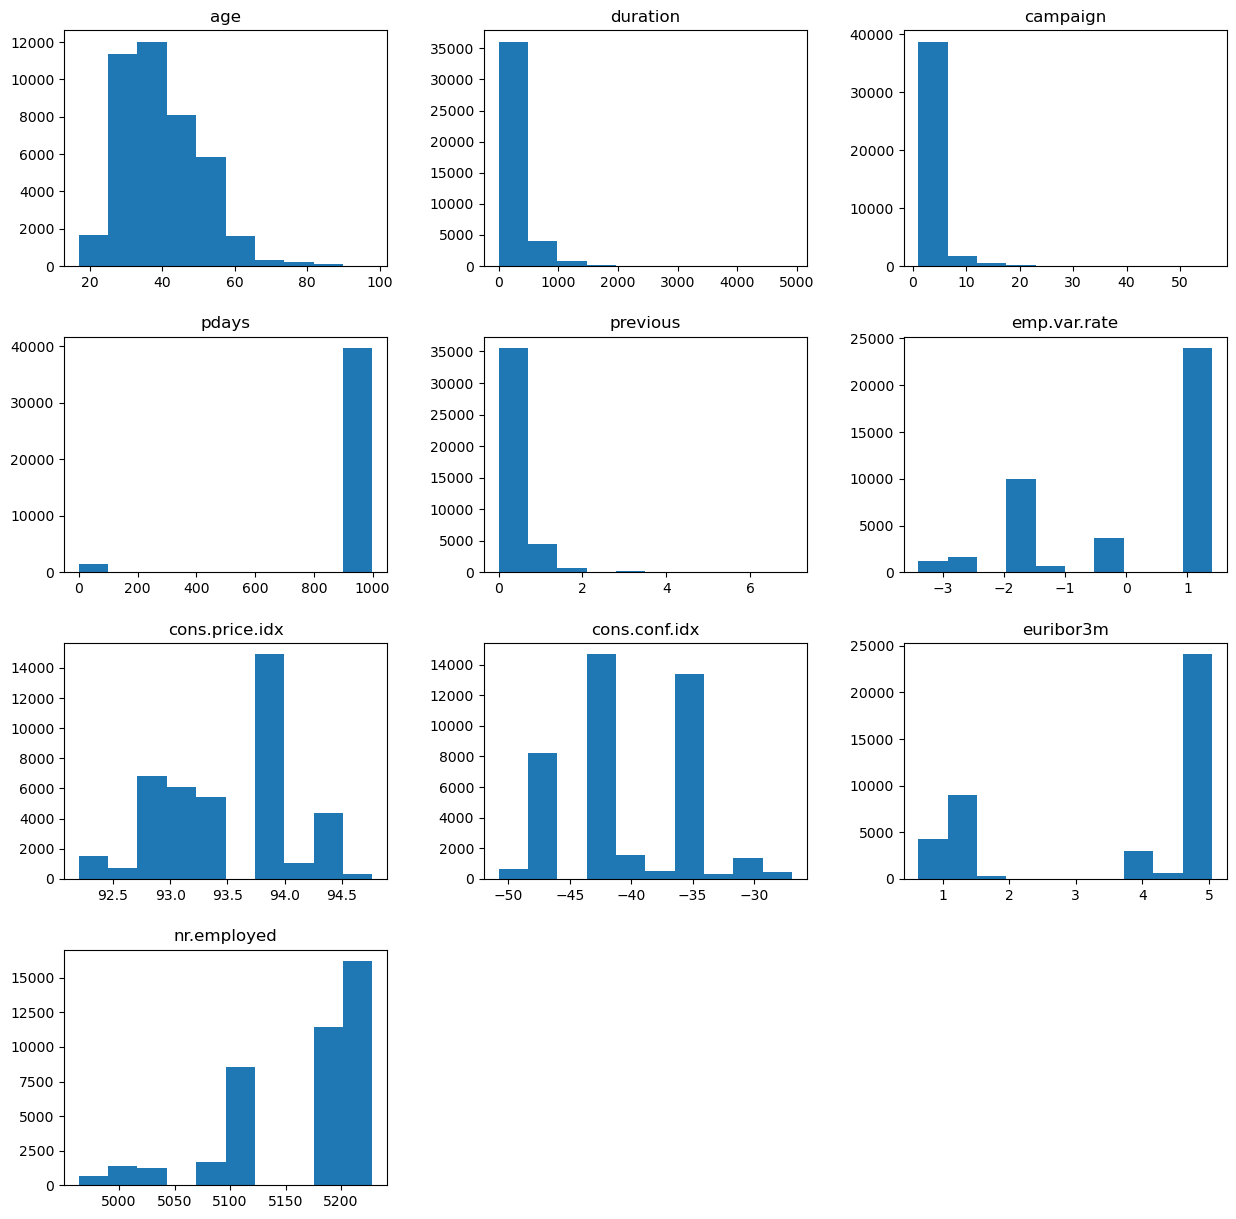

In [112]:
df.hist(figsize=(15,15), grid=False)

array([<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>], dtype=object)

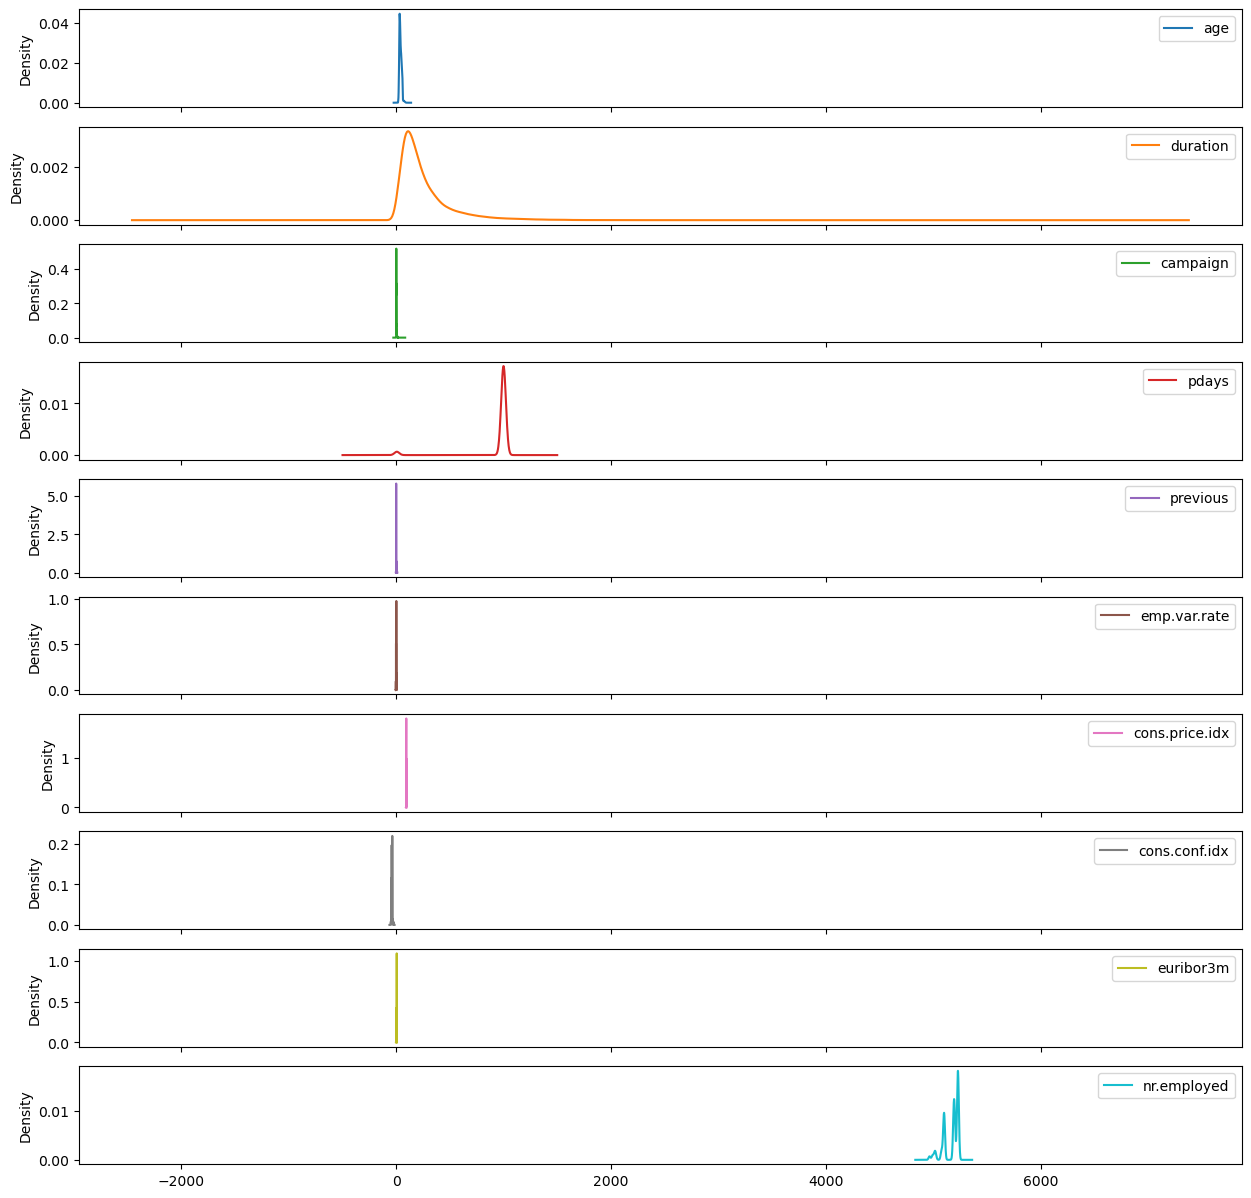

In [113]:
df.plot( kind = 'kde', figsize=(15,15), subplots=True)

In [114]:
df.describe(include ='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10419,24921,12164,32577,21571,33938,26135,13767,8618,35551,36537


In [115]:
df.groupby('y').describe().T

y                            no          yes
age         count  36537.000000  4639.000000
            mean      39.910994    40.912266
            std        9.897176    13.838838
            min       17.000000    17.000000
            25%       32.000000    31.000000
...                         ...          ...
nr.employed min     4963.600000  4963.600000
            25%     5099.100000  5017.500000
            50%     5195.800000  5099.100000
            75%     5228.100000  5191.000000
            max     5228.100000  5228.100000

[80 rows x 2 columns]

y
no     0.887337
yes    0.112663
Name: proportion, dtype: float64

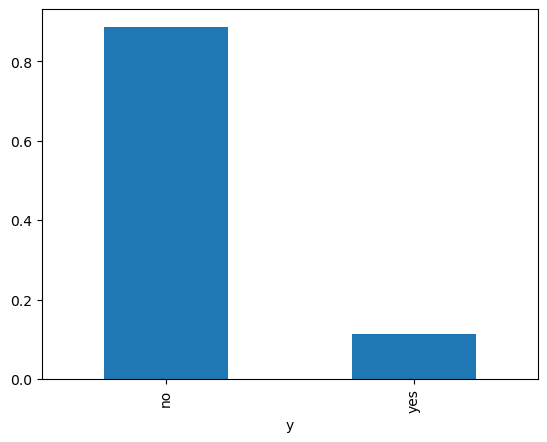

In [116]:
df['y'].value_counts(normalize=True).plot(kind='bar')
df['y'].value_counts(normalize=True) #dummy classifier is good 88% only, we had to beat 88.7% for any algorithm we use

In [117]:
cat_list = df.select_dtypes('object').columns.tolist()
cat_list

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

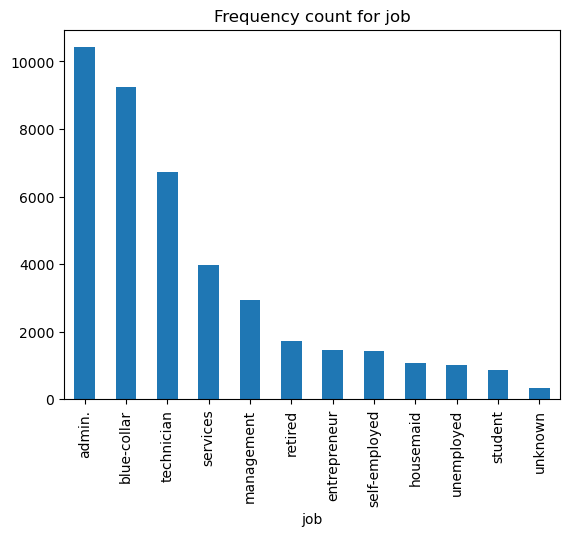

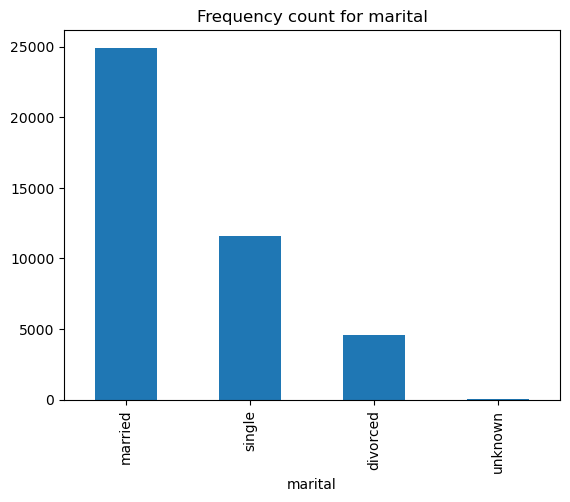

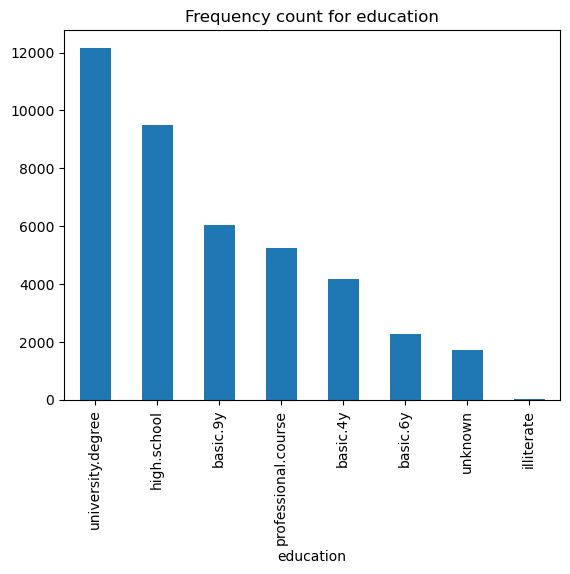

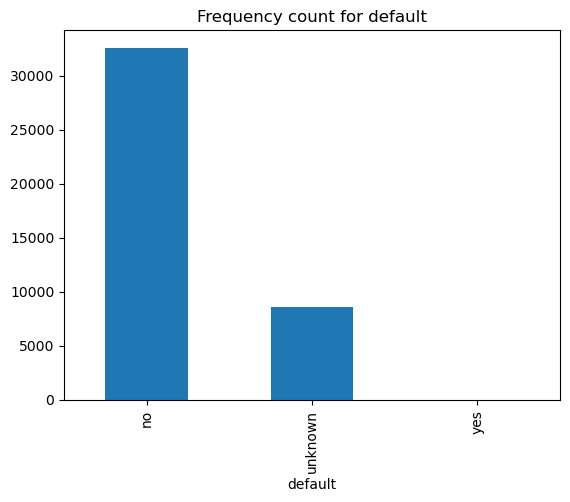

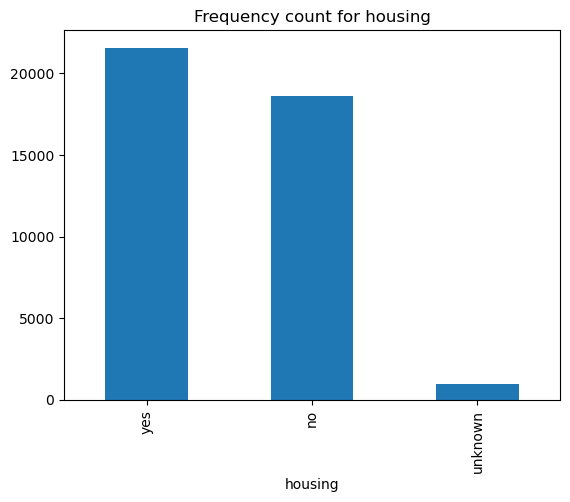

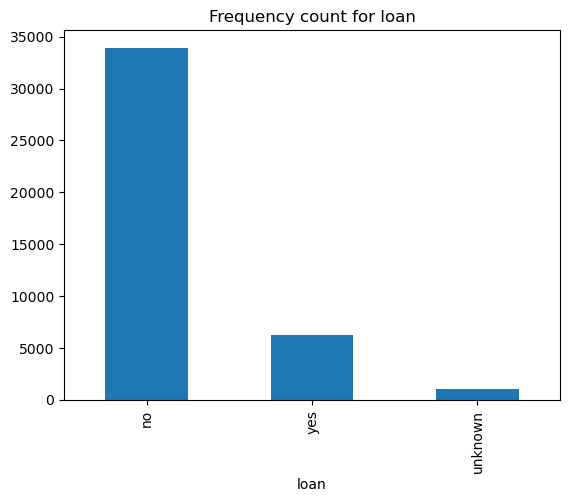

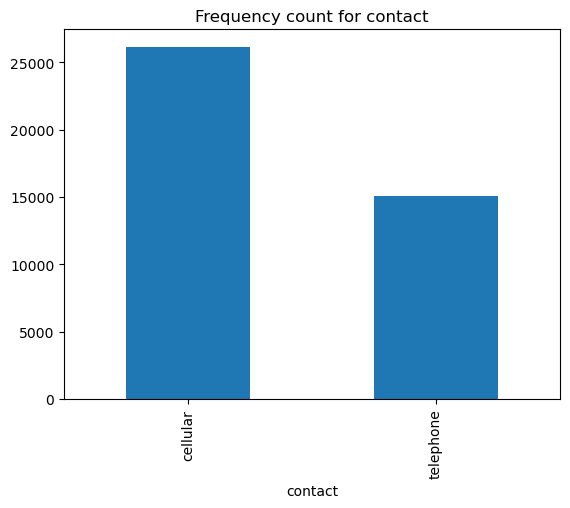

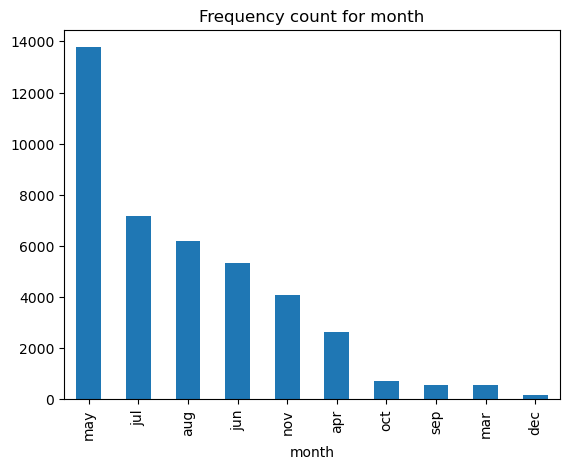

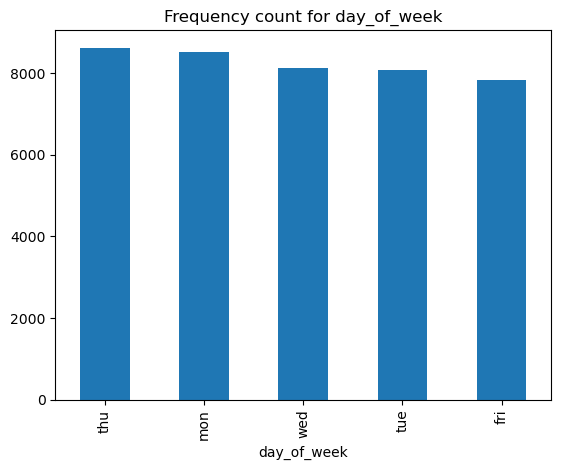

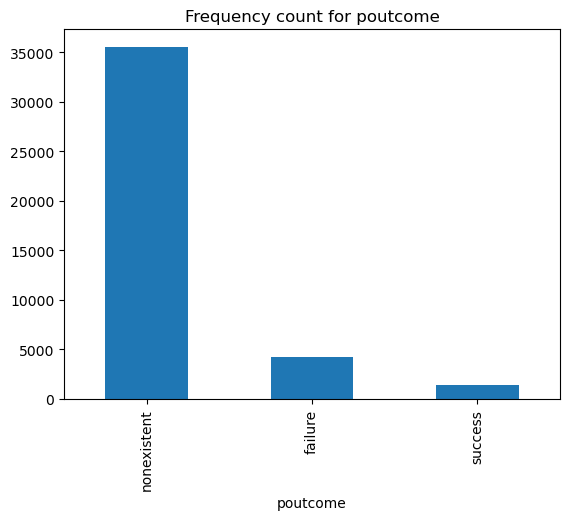

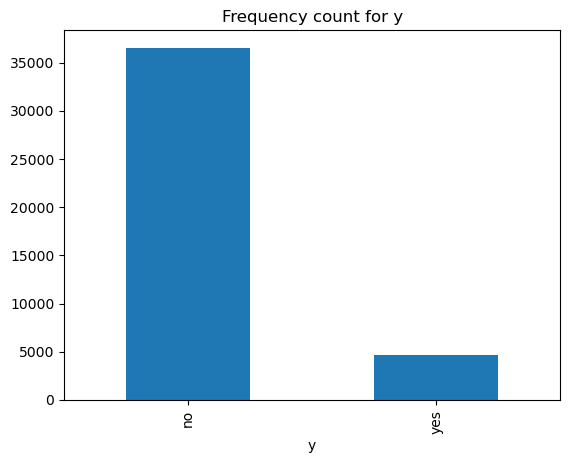

In [118]:
for cat in cat_list:
    df[cat].value_counts().plot(kind='bar', title=f'Frequency count for {cat}')
    plt.show()

In [119]:
df['y'] = df['y'].replace({'no': 0, 'yes': 1});

# also can be done by label encoder later:
# encoder = LabelEncoder()
# y_train = encoder.fit_transform(y_train)
# y_test = encoder.transofrm(y_test)

C:\Users\Slytherin\AppData\Local\Temp\ipykernel_17028\1917774928.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['y'] = df['y'].replace({'no': 0, 'yes': 1});


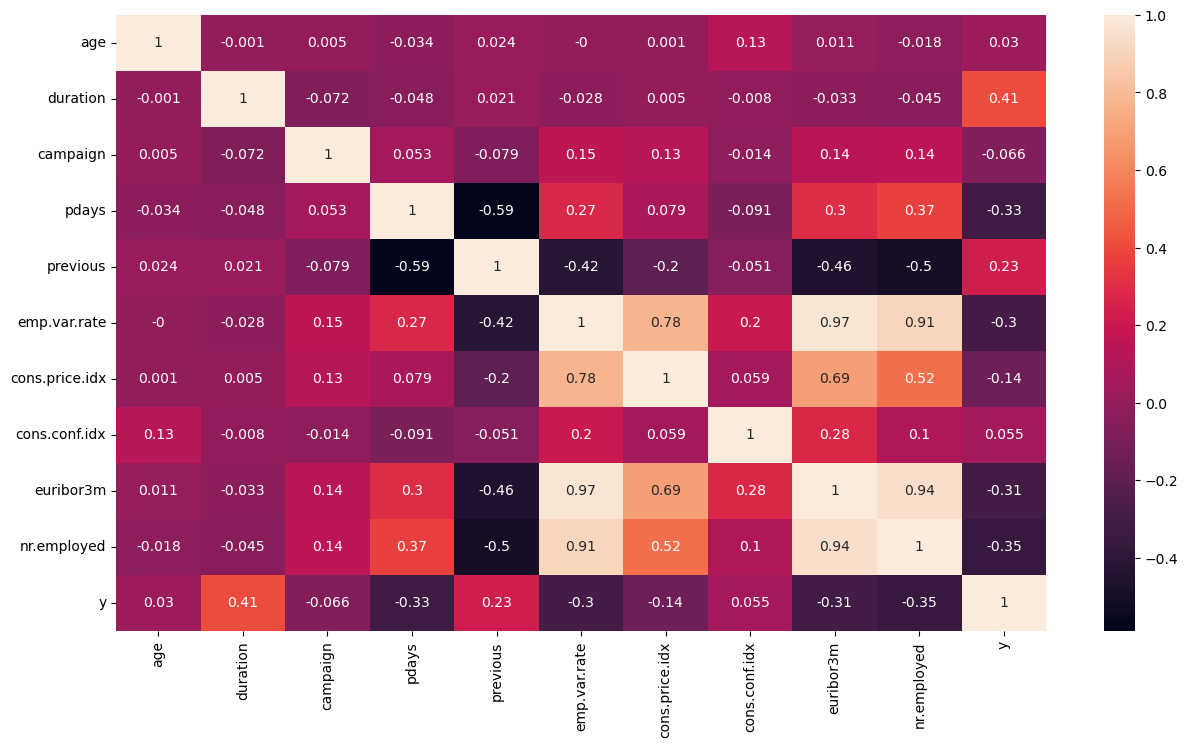

In [120]:
#bi-variate analysis
corr = df.corr(numeric_only = True).round(3)
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot = True);

In [121]:
df.groupby('y')['duration'].mean().round()

y
0    221.0
1    553.0
Name: duration, dtype: float64

In [122]:
df.groupby('y')['duration'].median().round()

y
0    164.0
1    449.0
Name: duration, dtype: float64

In [123]:
pd.crosstab(df['y'], df['nr.employed'], normalize=True).round(3)

nr.employed,4963.6,4991.6,5008.7,5017.5,5023.5,5076.2,5099.1,5176.3,5191.0,5195.8,5228.1
y,,,,,,,,,,,
0,0.008,0.009,0.007,0.015,0.002,0.026,0.181,0.0,0.183,0.084,0.373
1,0.007,0.010,0.009,0.011,0.002,0.014,0.027,0.0,0.006,0.006,0.021


<Axes: title={'center': 'Avg Acceptance across Months'}, xlabel='month'>

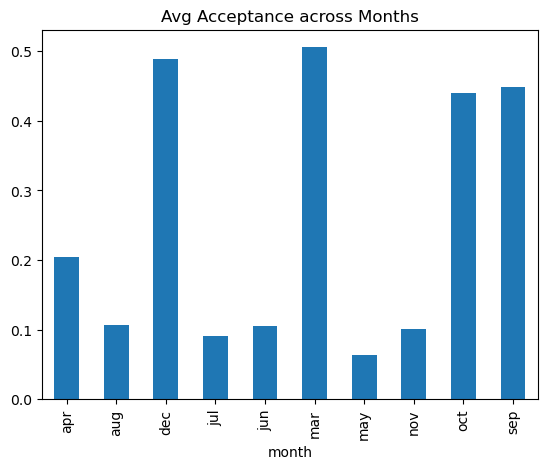

In [124]:
df.groupby('month')['y'].mean().plot(kind='bar', title='Avg Acceptance across Months')

In [125]:
df['month'] = df['month'].replace({'apr': 4, 'aug': 8, 'dec':12, 'jul':7, 'jun':6, 'mar':3, 'may':5, 'nov':11, 'oct':10, 'sep':9})

C:\Users\Slytherin\AppData\Local\Temp\ipykernel_17028\3874453033.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['month'] = df['month'].replace({'apr': 4, 'aug': 8, 'dec':12, 'jul':7, 'jun':6, 'mar':3, 'may':5, 'nov':11, 'oct':10, 'sep':9})


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  int64  
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [127]:
# sklearn OneHotEncoder, pandas: get_dummies

df2 = pd.get_dummies(df, drop_first=True)

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
X = df2.drop(columns = 'y')
y = df2['y']

In [130]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [131]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)

print('\n')

print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

display(X_train.head())
display(y_train.head())


X_train: (28823, 45)
y_train: (28823,)


X_test: (12353, 45)
y_test: (12353,)


,age,month,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,housing_yes,loan_unknown,loan_yes,contact_telephone,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
39478,75,4,162,1,6,2,-1.8,93.749,-34.6,0.642,...,False,False,False,True,False,False,True,False,False,True
28422,50,4,339,1,999,0,-1.8,93.075,-47.1,1.435,...,False,False,False,False,False,True,False,False,True,False
28808,28,4,71,2,999,1,-1.8,93.075,-47.1,1.410,...,False,True,False,False,False,True,False,False,False,False
14844,31,7,45,1,999,0,1.4,93.918,-42.7,4.957,...,True,False,True,False,False,False,False,True,True,False
39320,59,3,254,2,999,0,-1.8,93.369,-34.8,0.639,...,True,False,False,False,True,False,False,False,True,False


39478    1
28422    0
28808    0
14844    0
39320    1
Name: y, dtype: int64

In [132]:
X_train.select_dtypes(['int', 'float']).head()

,age,month,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
39478,75,4,162,1,6,2,-1.8,93.749,-34.6,0.642,5008.7
28422,50,4,339,1,999,0,-1.8,93.075,-47.1,1.435,5099.1
28808,28,4,71,2,999,1,-1.8,93.075,-47.1,1.410,5099.1
14844,31,7,45,1,999,0,1.4,93.918,-42.7,4.957,5228.1
39320,59,3,254,2,999,0,-1.8,93.369,-34.8,0.639,5008.7


In [133]:
to_be_scaled_columns = ['age', 'month', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
                        'euribor3m', 'nr.employed']

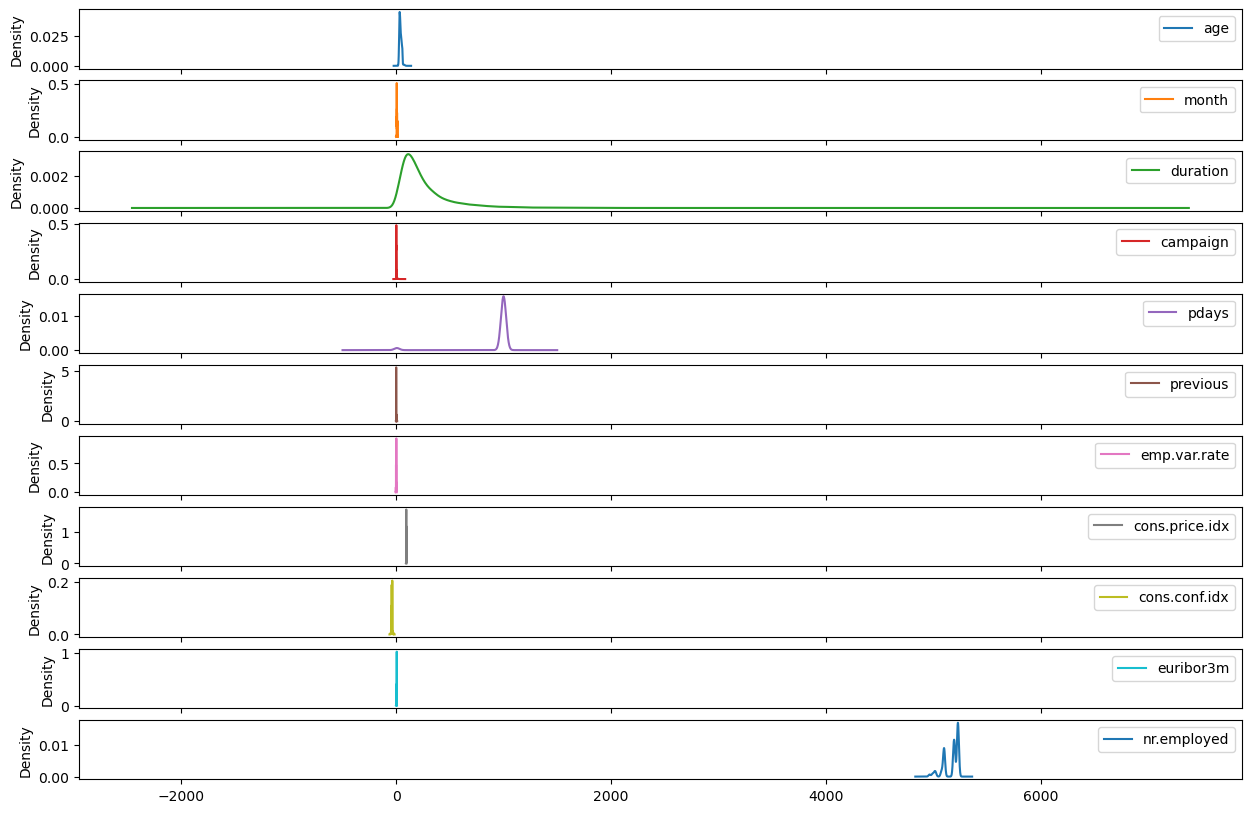

In [134]:
X_train[to_be_scaled_columns].plot(kind = 'kde', subplots = True, figsize=(15,10));

In [135]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[to_be_scaled_columns] = scaler.fit_transform(X_train[to_be_scaled_columns])
X_test[to_be_scaled_columns] = scaler.transform(X_test[to_be_scaled_columns])


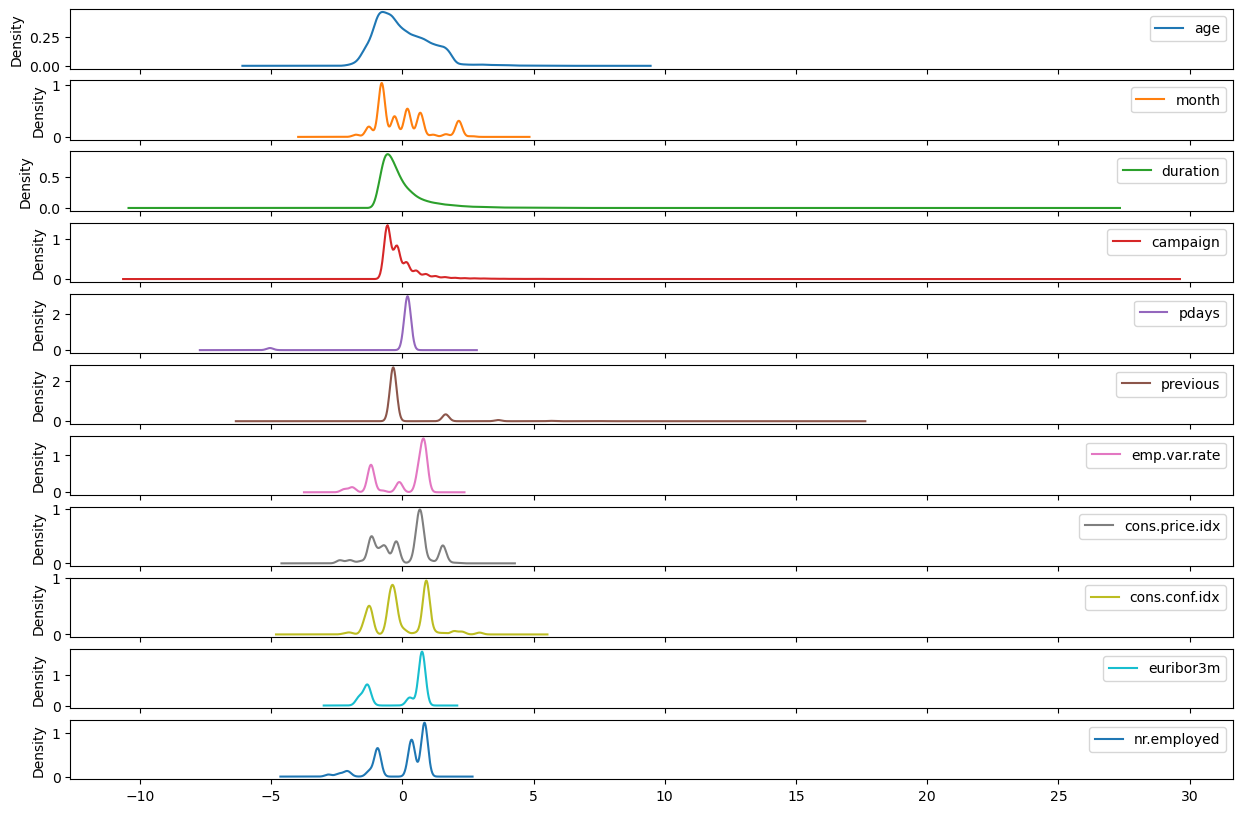

In [136]:
X_train[to_be_scaled_columns].plot(kind = 'kde', subplots = True, figsize=(15,10));

In [137]:
# check to see if scaler worked:
X_train[to_be_scaled_columns].agg(['mean', 'std']).round(1)

,age,month,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
mean,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [138]:
from sklearn.dummy import DummyClassifier


def plot_confusion_matrix(model, X, y, title):
    #generate cm:
    cm = confusion_matrix(y, model.predict(X), labels = model.classes_)

    #display
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)

    #show plot
    disp.plot()
    disp.ax_.set_title(title)
    plt.show()

In [139]:
dummy = DummyClassifier()

In [140]:
dummy.fit(X_train, y_train)

DummyClassifier()

In [141]:
print('The accuracy of the model for Train is {:.2f}'.format(dummy.score(X_train, y_train)))

The accuracy of the model for Train is 0.89


In [142]:
print('The accuracy of the model for Test is {:.2f}'.format(dummy.score(X_test, y_test)))

The accuracy of the model for Test is 0.89


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [143]:
from sklearn.linear_model import LogisticRegression

In [144]:
lr = LogisticRegression()

start = time.time()
lr.fit(X_train, y_train)
lr_time = time.time() - start


### Problem 9: Score the Model

What is the accuracy of your model?

In [145]:
accuracy_lr_train = lr.score(X_train, y_train)
accuracy_lr_test = lr.score(X_test, y_test)

print('The accuracy of the model for Train is {:.2f}'.format(accuracy_lr_train))
print('The accuracy of the model for Test is {:.2f}'.format(accuracy_lr_test))

The accuracy of the model for Train is 0.91
The accuracy of the model for Test is 0.91


In [146]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

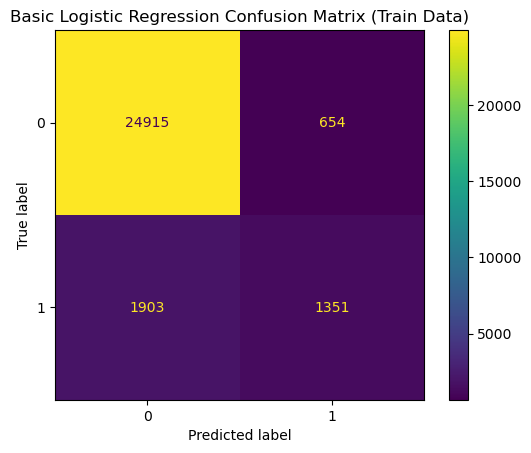

In [147]:
plot_confusion_matrix(lr, X_train, y_train, 'Basic Logistic Regression Confusion Matrix (Train Data)')

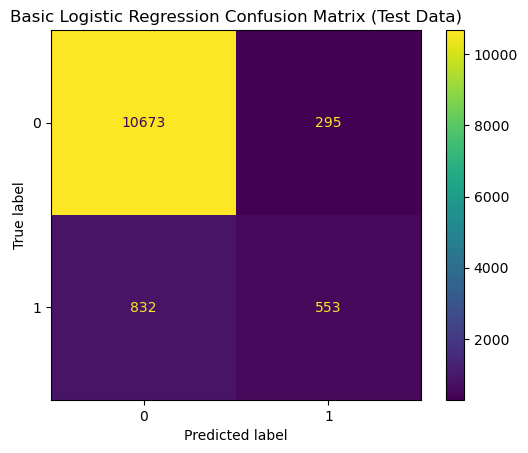

In [148]:
plot_confusion_matrix(lr, X_test, y_test, 'Basic Logistic Regression Confusion Matrix (Test Data)')

In [149]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print ('Accuracy of LR: ', accuracy_score(y_test, lr.predict(X_test)))
print ('Recall of LR: ', recall_score(y_test, lr.predict(X_test)))
print ('Precision of LR: ', precision_score(y_test, lr.predict(X_test)))

Accuracy of LR:  0.9087671011090424
Recall of LR:  0.3992779783393502
Precision of LR:  0.652122641509434


In [150]:
from sklearn.metrics import classification_report

In [151]:
y_pred = lr.predict(X_test)
target_names = ['no', 'yes']
print(classification_report(y_test, y_pred, target_names= target_names))

              precision    recall  f1-score   support

          no       0.93      0.97      0.95     10968
         yes       0.65      0.40      0.50      1385

    accuracy                           0.91     12353
   macro avg       0.79      0.69      0.72     12353
weighted avg       0.90      0.91      0.90     12353



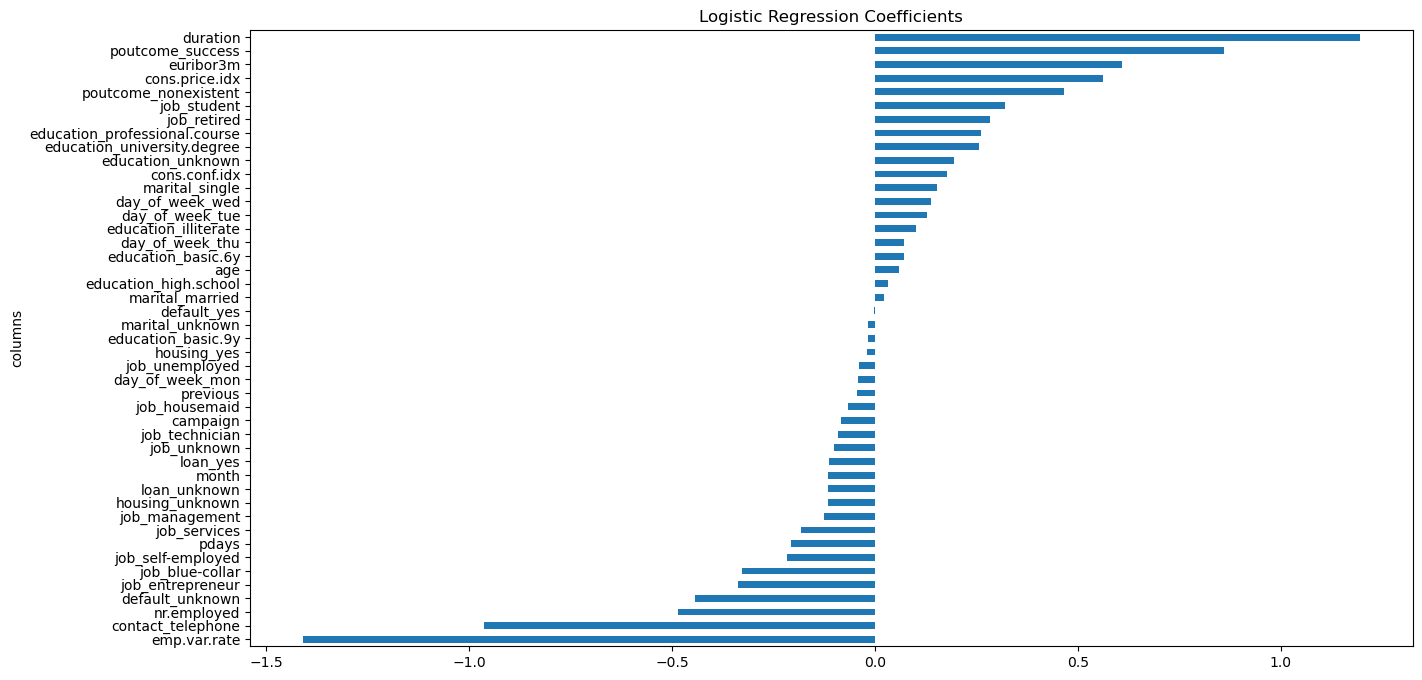

In [152]:
coefs = lr.coef_[0]

labels = X_train.columns.tolist()

lr_results = pd.DataFrame({'columns':labels, 'values':coefs, 'absolute':abs(coefs)}).sort_values(by = 'values')

lr_results.plot(kind = 'barh', x='columns', y='values', legend=False, figsize=(15,8))
plt.title('Logistic Regression Coefficients')

plt.show()

In [153]:
lr_results.sort_values(by='absolute', ascending=False)

#important columns = ['emp.var.rate', 'duration', 'contact', 'poutcome', 'euribor3m', 'cons.price.idx', 'nr.employed' ]
# non-linear important columns: 'cons.conf.idx', 'month', 


,columns,values,absolute
6,emp.var.rate,-1.409687,1.409687
2,duration,1.195033,1.195033
38,contact_telephone,-0.962538,0.962538
44,poutcome_success,0.859308,0.859308
9,euribor3m,0.609421,0.609421
7,cons.price.idx,0.562758,0.562758
10,nr.employed,-0.484225,0.484225
43,poutcome_nonexistent,0.466128,0.466128
32,default_unknown,-0.443414,0.443414
12,job_entrepreneur,-0.337939,0.337939


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [154]:
from sklearn.neighbors import KNeighborsClassifier


In [155]:
knn = KNeighborsClassifier()

start = time.time()
knn.fit(X_train, y_train)
knn_time = time.time() - start

In [156]:
accuracy_knn_train = knn.score(X_train, y_train)
accuracy_knn_test = knn.score(X_test, y_test)
print('The accuracy of the KNN model for Train is {:.2f}'.format(accuracy_knn_train))
print('The accuracy of the KNN model for Test is {:.2f}'.format(accuracy_knn_test))

The accuracy of the KNN model for Train is 0.93
The accuracy of the KNN model for Test is 0.90


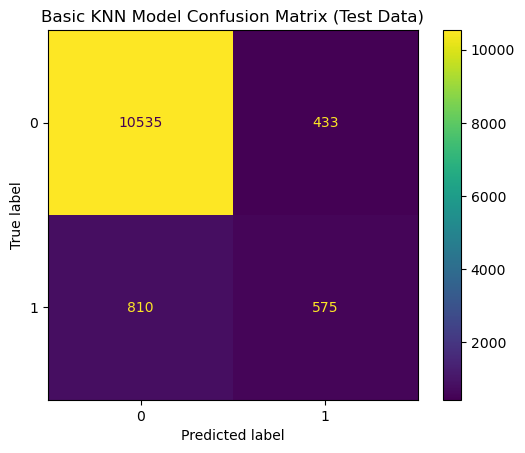

In [157]:
plot_confusion_matrix(knn, X_test, y_test, 'Basic KNN Model Confusion Matrix (Test Data)')

In [158]:
from sklearn.tree import DecisionTreeClassifier

In [159]:
dt = DecisionTreeClassifier()


start = time.time()
dt.fit(X_train, y_train)
dt_time = time.time() - start

In [160]:
accuracy_dt_train = dt.score(X_train, y_train)
accuracy_dt_test = dt.score(X_test, y_test)
print('The accuracy of the DT model for Train is {:.2f}'.format(accuracy_dt_train))
print('The accuracy of the DT model for Test is {:.2f}'.format(accuracy_dt_test))

The accuracy of the DT model for Train is 1.00
The accuracy of the DT model for Test is 0.89


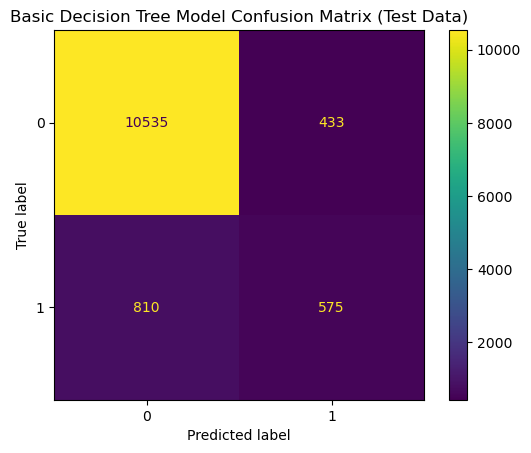

In [161]:
plot_confusion_matrix(knn, X_test, y_test, 'Basic Decision Tree Model Confusion Matrix (Test Data)')

In [162]:
from sklearn.ensemble import RandomForestClassifier

In [163]:
rf = RandomForestClassifier()


start = time.time()
rf.fit(X_train, y_train)
rf_time = time.time() - start

In [164]:
accuracy_rf_train = rf.score(X_train, y_train)
accuracy_rf_test = rf.score(X_test, y_test)
print('The accuracy of the RF model for Train is {:.2f}'.format(accuracy_rf_train))
print('The accuracy of the RF model for Test is {:.2f}'.format(accuracy_rf_test))

The accuracy of the RF model for Train is 1.00
The accuracy of the RF model for Test is 0.91


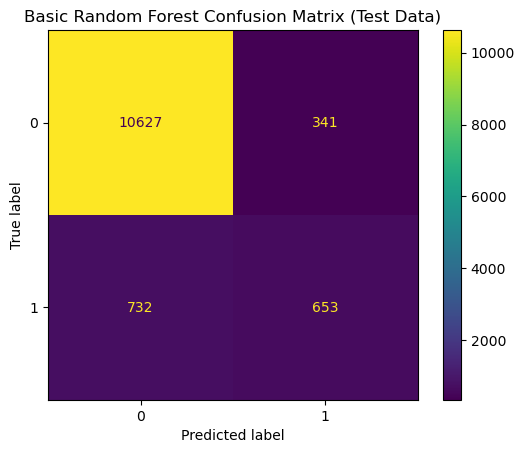

In [165]:
plot_confusion_matrix(rf, X_test, y_test, 'Basic Random Forest Confusion Matrix (Test Data)')

C:\Users\Slytherin\AppData\Local\Temp\ipykernel_17028\1336615215.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


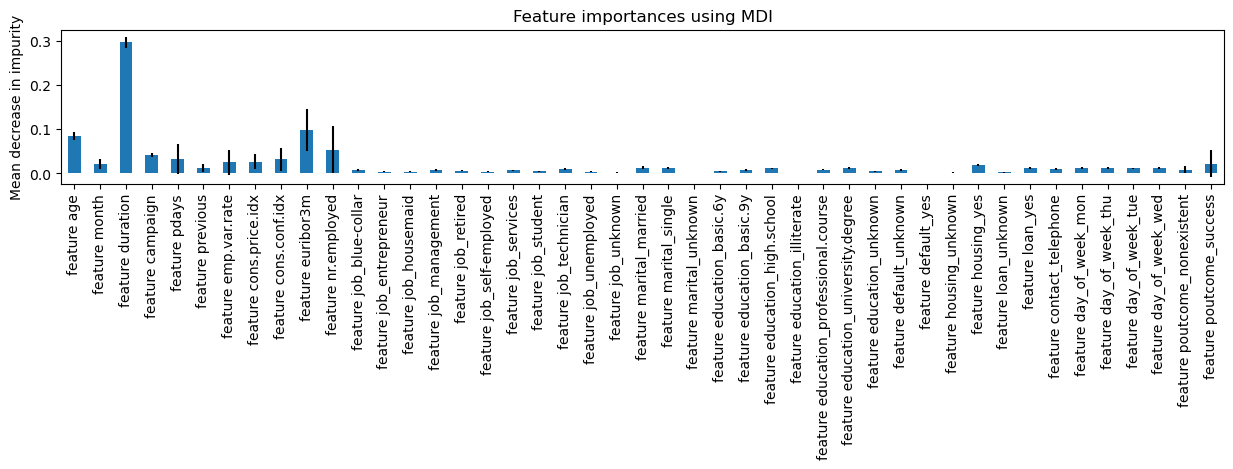

In [176]:
import numpy as np

feature_names = [f"feature {i}" for i in X.columns.tolist()]
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax, figsize=(15,2))
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [167]:
from sklearn.svm import SVC

In [168]:
svc = SVC()

start = time.time()
svc.fit(X_train, y_train)
svc_time = time.time() - start

In [169]:
accuracy_svc_train = svc.score(X_train, y_train)
accuracy_svc_test = svc.score(X_test, y_test)
print('The accuracy of the SVC model for Train is {:.2f}'.format(accuracy_svc_train))
print('The accuracy of the SVC model for Test is {:.2f}'.format(accuracy_svc_test))

The accuracy of the SVC model for Train is 0.92
The accuracy of the SVC model for Test is 0.91


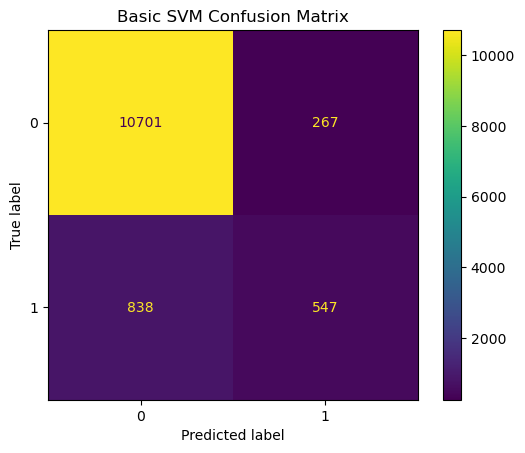

In [170]:
plot_confusion_matrix(svc, X_test, y_test, 'Basic SVM Confusion Matrix')

In [171]:
result_df = pd.DataFrame({ 
                          'Train Time':[lr_time, knn_time, dt_time, svc_time, rf_time], 
                          'Train Accuracy':[accuracy_lr_train, accuracy_knn_train, accuracy_dt_train, accuracy_svc_train, accuracy_rf_train], 
                          'Test Accuracy':[accuracy_lr_test, accuracy_knn_test, accuracy_dt_test, accuracy_svc_test, accuracy_rf_test]}, index=['Logistic Regression', 'KNN', 'Decision Tree', 'SVM', 'Random Forest'])

In [172]:
#print(result_df.to_string(index=False))
result_df

,Train Time,Train Accuracy,Test Accuracy
Logistic Regression,0.075531,0.911286,0.908767
KNN,0.008897,0.929084,0.899377
Decision Tree,0.098101,1.000000,0.892496
SVM,5.245734,0.922805,0.910548
Random Forest,1.412249,0.999965,0.913139


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [186]:
df3 = pd.get_dummies(df.drop([ 'job', 'marital', 'day_of_week', 'default', 'loan', 'cons.conf.idx','previous',
                            'poutcome', 'previous','education', 'campaign', 'housing'], axis=1), drop_first=True)

In [187]:
X = df3.drop(columns = 'y')
y = df3['y']

In [188]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [189]:
to_be_scaled_columns = ['age','duration', 'emp.var.rate', 'cons.price.idx', 'pdays', 'euribor3m', 'nr.employed', 'month', ]

In [190]:
X_train[to_be_scaled_columns] = scaler.fit_transform(X_train[to_be_scaled_columns])
X_test[to_be_scaled_columns] = scaler.transform(X_test[to_be_scaled_columns])

In [191]:
dummy.fit(X_train, y_train)

print('The accuracy of the model for Train is {:.2f}'.format(dummy.score(X_train, y_train)))
print('The accuracy of the model for Test is {:.2f}'.format(dummy.score(X_test, y_test)))

The accuracy of the model for Train is 0.89
The accuracy of the model for Test is 0.89


In [203]:
lr = LogisticRegression(class_weight='balanced', penalty='l2', fit_intercept=False, random_state=42)
lr.fit(X_train, y_train)

print('The accuracy of the model for Train is {:.2f}'.format(lr.score(X_train, y_train)))
print('The accuracy of the model for Test is {:.2f}'.format(lr.score(X_test, y_test)))

The accuracy of the model for Train is 0.82
The accuracy of the model for Test is 0.82


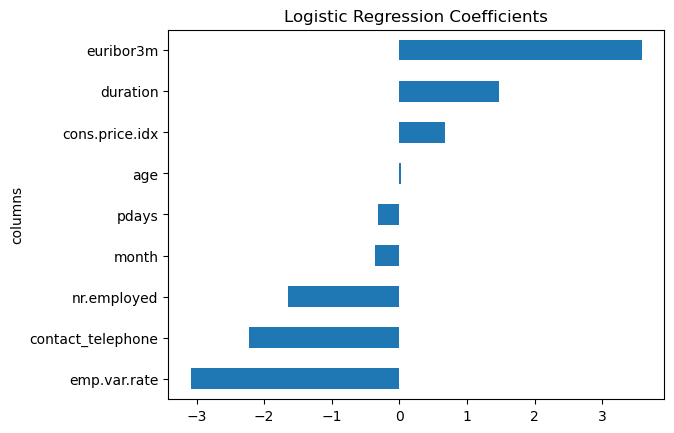

In [204]:
coefs = lr.coef_[0]

labels = X_train.columns.tolist()

lr_results = pd.DataFrame({'columns':labels, 'values':coefs}).sort_values(by = 'values')

lr_results.plot(kind = 'barh', x='columns', y='values', legend=False)
plt.title('Logistic Regression Coefficients')

plt.show()

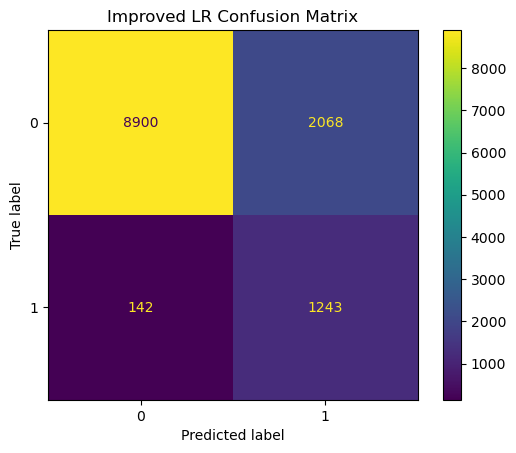

In [205]:
plot_confusion_matrix(lr, X_test, y_test, 'Improved LR Confusion Matrix')

In [206]:
print ('Accuracy of LR: ', accuracy_score(y_test, lr.predict(X_test)))
print ('Recall of LR: ', recall_score(y_test, lr.predict(X_test)))
print ('Precision of LR: ', precision_score(y_test, lr.predict(X_test)))

Accuracy of LR:  0.8210960900186189
Recall of LR:  0.8974729241877256
Precision of LR:  0.3754152823920266


In [196]:
svc = SVC(kernel='rbf', class_weight={1: 10}, random_state=42)
svc.fit(X_train, y_train)

SVC(class_weight={1: 10}, random_state=42)

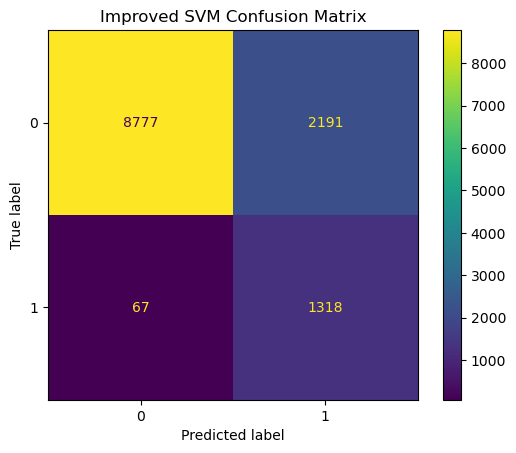

In [197]:
plot_confusion_matrix(svc, X_test, y_test, "Improved SVM Confusion Matrix")

In [207]:
print ('Accuracy of SVM: ', accuracy_score(y_test, svc.predict(X_test)))
print ('Recall of SVM: ', recall_score(y_test, svc.predict(X_test)))
print ('Precision of SVM: ', precision_score(y_test, svc.predict(X_test)))

Accuracy of SVM:  0.8172103942362179
Recall of SVM:  0.9516245487364621
Precision of SVM:  0.3756055856369336


## Hyperparameter Tuning

In [219]:
svc = SVC(kernel="poly", class_weight={1:10}, random_state=42)

param_dict = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'class_weight':['balanced', {1:2}, {1:5}, {1:10}], 'degree':[1,2,3,4,5]}
    
mygrid = GridSearchCV(estimator = svc, param_grid=param_dict, scoring = 'recall')
mygrid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(class_weight={1: 10}, kernel='poly',
                           random_state=42),
             param_grid={'class_weight': ['balanced', {1: 2}, {1: 5}, {1: 10}],
                         'degree': [1, 2, 3, 4, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='recall')

In [224]:
best_selector = mygrid.best_estimator_
best_selector

SVC(class_weight={1: 10}, degree=1, random_state=42)

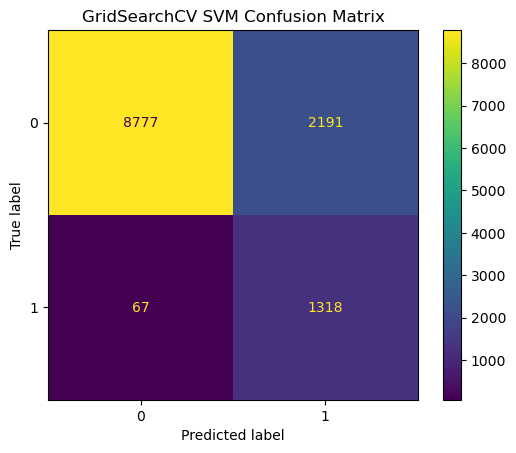

In [225]:
plot_confusion_matrix(best_selector, X_test, y_test, 'GridSearchCV SVM Confusion Matrix')

In [226]:
print ('Accuracy of GridSearchCV: ', accuracy_score(y_test, best_selector.predict(X_test)))
print ('Recall of GridSearchCV: ', recall_score(y_test, best_selector.predict(X_test)))
print ('Precision of GridSearchCV: ', precision_score(y_test, best_selector.predict(X_test)))

Accuracy of GridSearchCV:  0.8172103942362179
Recall of GridSearchCV:  0.9516245487364621
Precision of GridSearchCV:  0.3756055856369336


## Looking at non-linear Features:

In [212]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
print('The accuracy of the model for Train is {:.2f}'.format(rf.score(X_train, y_train)))
print('The accuracy of the model for Test is {:.2f}'.format(rf.score(X_test, y_test)))

The accuracy of the model for Train is 1.00
The accuracy of the model for Test is 0.91


In [231]:
print ('Accuracy of Improved RF: ', accuracy_score(y_test, rf.predict(X_test)))
print ('Recall of Improved RF: ', recall_score(y_test, rf.predict(X_test)))
print ('Precision of Improved RF: ', precision_score(y_test, rf.predict(X_test)))

Accuracy of Improved RF:  0.9097385250546426
Recall of Improved RF:  0.5068592057761733
Precision of Improved RF:  0.6190476190476191


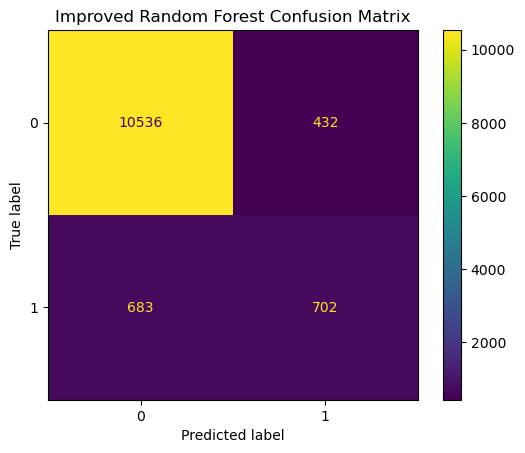

In [213]:
plot_confusion_matrix(rf, X_test, y_test, 'Improved Random Forest Confusion Matrix')

In [214]:
import numpy as np

feature_names = [f"feature {i}" for i in X.columns.tolist()]
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

C:\Users\Slytherin\AppData\Local\Temp\ipykernel_17028\3028848110.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


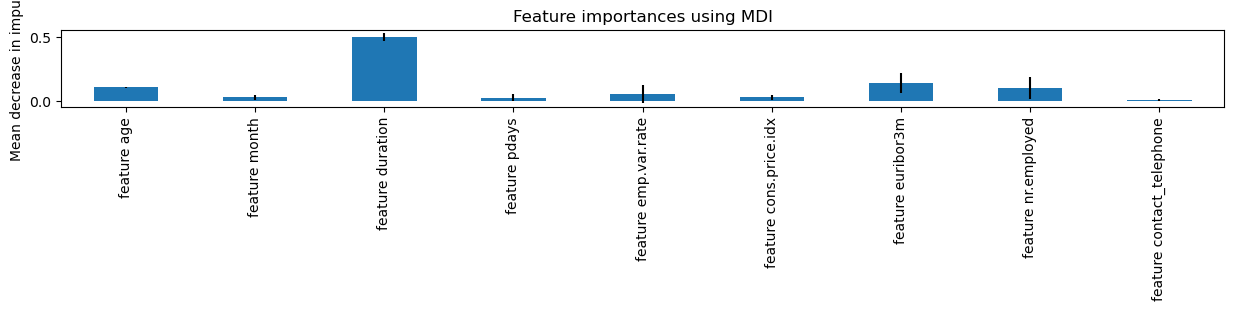

In [230]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(15,1))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## ROC Curve and 80% Probability :
While this method results in best False Positive rate, it sacrifices the accuracy and we have to go through half of the population. This can be costly from the business stand point, but a more detailed cost analysis is needed to find the best balance.

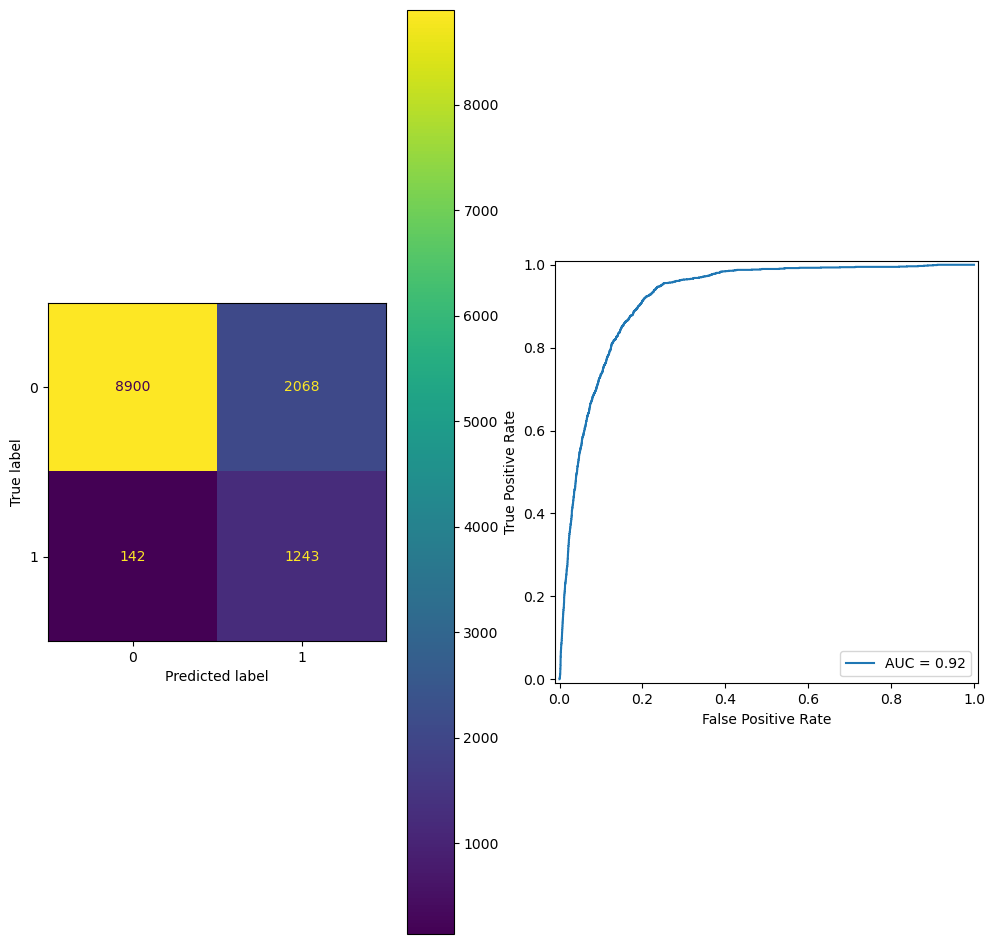

In [232]:
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import auc as skl_auc

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 12)

preds = lr.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, preds)
disp1 = ConfusionMatrixDisplay(conf_matrix)
disp1.plot(ax=ax[0])


y_score = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)
roc_auc_value = skl_auc(fpr, tpr)

disp2 = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_value)
disp2.plot(ax=ax[1])

fp = conf_matrix[0][1]
fn = conf_matrix[1][0]
auc = round(roc_auc_value, 2)



In [233]:
no_probs = lr.predict_proba(X_test)[:, 0]
high_prob_no = no_probs[no_probs > 0.8]
percent_of_test_data = len(high_prob_no)/len(y_test)
percent_of_no = len(high_prob_no)/sum(y_test == 0)

### END SOLUTION

### ANSWER CHECK
print(percent_of_test_data)
print(percent_of_no)

0.472354893548126
0.5320021881838074


In [234]:
from sklearn.metrics import accuracy_score

prob_threshold = 0.20

pred_proba_df = pd.DataFrame(lr.predict_proba(X_test))
y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>prob_threshold else 0)


test_accuracy = accuracy_score(y_test.values.reshape(y_test.values.size,1),
                                       y_test_pred.iloc[:,1].values.reshape(y_test_pred.iloc[:,1].values.size,1))
print('Our testing accuracy is {}'.format(test_accuracy))

print(confusion_matrix(y_test.values.reshape(y_test.values.size,1),
                       y_test_pred.iloc[:,1].values.reshape(y_test_pred.iloc[:,1].values.size,1)))


Our testing accuracy is 0.5818829434145552
[[5819 5149]
 [  16 1369]]


C:\Users\Slytherin\AppData\Local\Temp\ipykernel_17028\1892953266.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>prob_threshold else 0)


##### Questions